In [144]:
#Importing important libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [145]:
# Loading the data set
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6182,2925-VDZHY,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.70,6501.35,No
6488,0488-GSLFR,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.50,69.5,Yes
3344,6347-DCUIK,Male,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.15,811.8,Yes
4766,1043-UXOVO,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),113.15,7993.3,No
4280,9135-HSWOC,Male,0,Yes,Yes,64,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.70,1274.05,No


In [146]:
# Dropping the column customer id as it is useless for our training The axis is set to columns to delete that column and inplace = true means that the column will be dropped in real time and the file will be updated
df.drop('customerID',axis='columns',inplace=True)

In [147]:
# Checking the columns and their data types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [148]:
# We can see that total charges is an object instead of being a float That's why we cheque the values and convert it
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [149]:
# Taking reference from monthlycharges column
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [150]:
# Finally, converting our total charges
# pd.to_numeric(df.TotalCharges)

# The above code gives the following error:ValueError: Unable to parse string " " at position 488
# To tackle this we change our empty strings in our further steps

In [151]:
#Here we have error due to some values having empty string so we check the values
# here we do isnull to get the values for null if yes then True
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [152]:
# Checking the value for 488th value
df.iloc[488]['TotalCharges']

' '

In [153]:
# Choosing only the rows where totalcharges isn't empty

df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [154]:
# Now let's again run that error code
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-154-5b545bca8374>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [155]:
# Checking the datatype now:

df1.TotalCharges.dtypes

dtype('float64')

Tenure of Customers checking


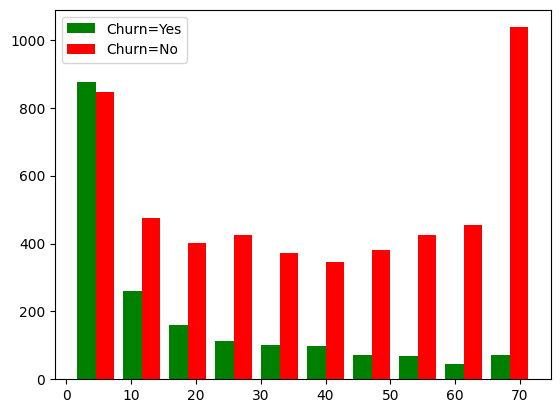

In [156]:
# Separating the customers based on the tenure that they are with the company On the condition that they are churned or not
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

#Plotting Histogram for the same

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()

In [157]:
# Making a function to cheque the unique values in the columns that are objects
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}:{df[column].unique()}')

In [158]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [159]:
# In tech support and streaming TV columns, We replace the 'no Internet service' with No

In [160]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

<ipython-input-160-f205fe68192d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
<ipython-input-160-f205fe68192d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [161]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [162]:
# Making a list of columns that has either yes or no And replacing them with 1 and 0 respectively
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-162-353058a0c049>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [163]:
# printing the unique values again
for column in df1:
  print(f'{column}:{df[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889

In [164]:
# Replacing Female and Male to 1 and 0 respectively
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-164-0c048110e27f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


We use One-Hot Encoding which is used for more than two unique values in a column.

So for example, if we have three values we will make three columns out of it And in these three columns we will assign values either one or zero.

So for specific columns that are selected we can assign one to That column if the row contains that value And the other two values will be zero And in the other rows where the other two Values are selected, we will select or put up 1 in those columns.

In [165]:
# here we make a different data frame That will create three columns of Internet service contract and payment method based in our data set

df2 = pd.get_dummies(data=df1,columns=['InternetService', 'Contract','PaymentMethod'])

#we check the columns now

df2.columns

# From the above result, we can see that for the columns that were selected, Based on the unique values we have created different columns.

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [204]:
# Checking if there are any string values or not
df2.dtypes

# List of columns to be converted from boolean to integer as while coverting in the above step if got converted to boolean
bool_columns = [
    'InternetService_DSL',
    'InternetService_Fiber optic',
    'InternetService_No',
    'Contract_Month-to-month',
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

# Replace True with 1 and False with 0 for each column
for column in bool_columns:
    df2[column] = df2[column].replace({True: 1, False: 0})

In [167]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
636,0,0,0,0,31,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1426,0,1,1,0,71,1,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
6370,1,0,0,0,45,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2460,1,0,1,1,48,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2017,0,0,1,0,38,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


From the data set we can see that the in three columns, tenure, MonthlyCharges and TotalCharges, The values are fluctuating on a very high scale


For this reason, we will scale our values



In [168]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [169]:
# Checking the values

df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4608,0,0,0,0,0.760563,1,1,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4169,1,0,0,0,0.197183,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2569,1,0,1,0,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3633,1,1,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2926,1,0,1,0,0.957746,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0


Now we will create a training and testing split For that we need  our x and Y

In [170]:
# Your ex will be every column except for churn. And why will be our churn column

X=df2.drop('Churn',axis='columns')
y=df2['Churn']


In [171]:
# We import our train_test_split from sklearn and use it on our data to seperate both
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [172]:
X_train.shape


(5625, 26)

In [173]:
X_test.shape

(1407, 26)

In [174]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


Deep learning starts from here.

In [192]:
# The import tensor flow and. Keras. to use our sequential model.

import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    # we use relu as activation
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#here we use epochs =100 for better results
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 7ms/step - loss: 0.5122 - accuracy: 0.7481
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4321 - accuracy: 0.7927
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4216 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4175 - accuracy: 0.8020
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8036
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8069
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4099 - accuracy: 0.8092
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4091 - accuracy: 0.8071
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4083 - accura

In [193]:
# We will evaluate our model using our test splits
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.7804


[0.4547650218009949, 0.7803837656974792]

In [179]:
# Now let's predict our values
yp=model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.2589811 ],
       [0.42062923],
       [0.00709925],
       [0.7344459 ],
       [0.40549964]], dtype=float32)

In [184]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [183]:
# As we can see we have a two dimensional array in the yp Will flatten it out and try to print out 1 if  it is churned and 0 if not
y_pred= []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


In [185]:
print(y_pred[:10])

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]


We will now make a classification report


In [186]:
# We use confusion matrix and classification report

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       999
           1       0.67      0.49      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

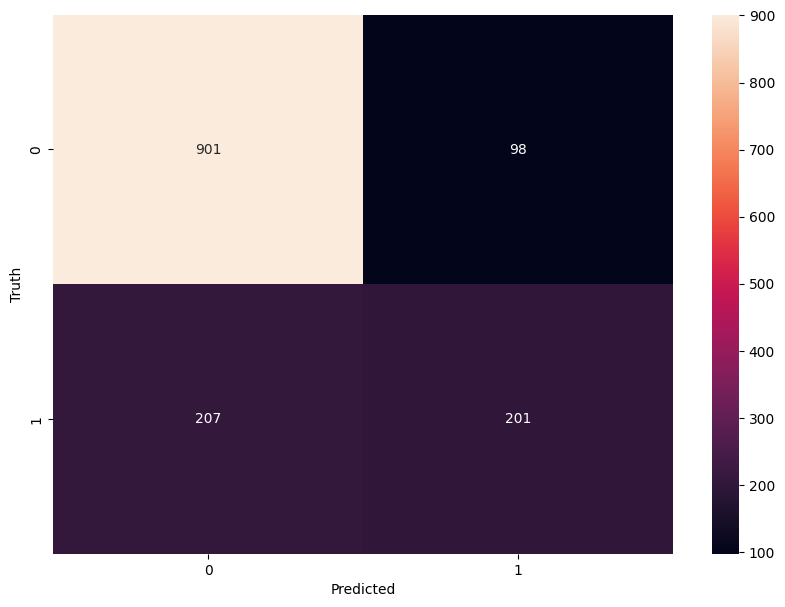

In [187]:
# Now let's look into our confusion matrix first
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Based on the above confusion matrix the diagonal ones are the values which we predicted correctly. And the non diagonal ones are the ones that we predicted incorrectly So therefore, in total of 207 Plus 98 that is in total 306 times our model predicted the values wrong

In [200]:
# lets calculate our accuracy
round((901+201)/(901+201+98+207),3)


0.783

In [202]:
# Let's print our precision for class zero that is, precision for the customers that did not churn
precision_0 = round(901 / (901 + 207), 3)
print(precision_0)

0.813


In [203]:
# Let's print our precision for class that is, precision for the customers that churned

precision_1 = round(201 / (201 + 98), 3)
print(precision_1)

0.672


In [201]:
# Let's print a recall for class zero and class one

recall_0 = round(901 / (901 + 98), 3)
recall_1 = round(201 / (201 + 207), 3)

print(recall_0)
print(recall_1)

0.902
0.493
